Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import umint
import random
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

/home/chayan/anaconda3/envs/umint/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing Data

In [4]:
dir = '/home/chayan/UMINT/pbmc10k/preprocessed_hvg/'
rna = pd.read_csv(dir+'pbmc10k_rna_hvg_matched_cells.csv',header = 0 , index_col= 0)
atac = pd.read_csv(dir+'pbmc10k_atac_hvg_matched_cells.csv',header = 0 , index_col= 0)

rna_labels = pd.read_csv(dir+'pbmc10k_groundTruth_rna.csv',header = 0 , index_col= 0)
atac_labels = pd.read_csv(dir+'pbmc10k_groundTruth_atac.csv',header = 0 , index_col= 0)

x1 = rna
x2 = atac
y1 = rna_labels
y2 = atac_labels

z = pd.concat([x1, x2], axis=1)

In [5]:
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025
AAACAGCCAATCCCTT-1,1.102886,3.370006,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,-0.011314,-0.106943,-0.172993
AAACAGCCAATGCGCT-1,0.560188,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.612131,-0.106943,-0.172993
AAACAGCCAGGATAAC-1,-0.665826,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.774370,-0.106943,-0.172993
AAACAGCCAGTAGGTG-1,-0.665826,-0.274663,-0.162348,-0.16983,1.682746,-0.095876,10.00000,-0.358511,-0.237459,2.051676,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.566524,-0.106943,-0.172993
AAACAGCCAGTTTACG-1,1.139774,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,1.266671,-0.106943,-0.172993


In [6]:
x2.head()

,0,1,2,3,4,5,6,7,8,9,...,19420,19421,19422,19423,19424,19425,19426,19427,19428,19429
AAACAGCCAATCCCTT-1,-0.168695,1.914308,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,-0.332080,0.709562,...,-0.295279,-0.178485,-0.126761,-0.284094,3.172661,-0.117172,0.812724,-0.118194,-0.147035,-0.167044
AAACAGCCAATGCGCT-1,-0.168695,1.258737,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,2.679726,-0.884087,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,-0.845831,-0.118194,-0.147035,-0.167044
AAACAGCCAGGATAAC-1,-0.168695,-0.709808,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,-0.332080,-0.884087,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,-0.845831,-0.118194,-0.147035,-0.167044
AAACAGCCAGTAGGTG-1,-0.168695,0.386950,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,1.489172,0.543075,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,1.008836,-0.118194,-0.147035,-0.167044
AAACAGCCAGTTTACG-1,-0.168695,1.108218,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,2.484665,0.653973,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,1.439804,-0.118194,-0.147035,-0.167044


In [7]:
le = preprocessing.LabelEncoder()
y1 = pd.DataFrame(le.fit_transform(np.ravel(rna_labels)))
y2 = pd.DataFrame(le.fit_transform(np.ravel(atac_labels)))

In [8]:
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.unique(y2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Proposed UMINT architecture
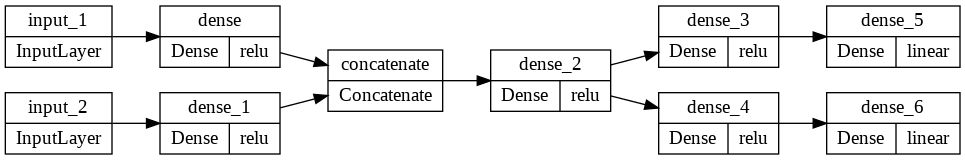

In [10]:
x1_train, x1_test, x2_train, x2_test, z_train, z_test = train_test_split(x1, x2, z, test_size=0.2, random_state=1)
MyEncoder, MyAE = umint.CombinedEncoder([x1_train, x2_train], [x1_test, x2_test], [128, 128], 64, 98, 0.0001, 0.001, 25, 16)
low = MyEncoder.predict([x1, x2])

237/237 [==============================] - 1s 5ms/step


In [11]:
from sklearn.decomposition import PCA
x1_pca = PCA(n_components = 64).fit_transform(x1)
x2_pca = PCA(n_components = 64).fit_transform(x2)

rnaUMAP = umap.UMAP(n_components=2).fit_transform(x1_pca)
atacUMAP = umap.UMAP(n_components=2).fit_transform(x2_pca)

In [12]:
lab1 = [rna_labels['celltype'][i] for i in range(rna_labels.shape[0])]
lab2 = [atac_labels['celltype'][i] for i in range(atac_labels.shape[0])]

col=['blue', 'green', 'orange', 'red', 'pink', 'gray', 'violet',
    'cyan','lime', 'royalblue' , 'skyblue', 'olive', 'tomato',
    'saddlebrown', 'sienna', 'navy', 'darkgreen', 'crimson']

classes1 = list(np.unique(lab1))
values1 = list(y1[0])
colors1 = ListedColormap(col)

classes2 = list(np.unique(lab2))
values2 = list(y2[0])
colors2 = ListedColormap(col)

In [14]:
low_umap = umap.UMAP(n_components=2).fit_transform(low)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


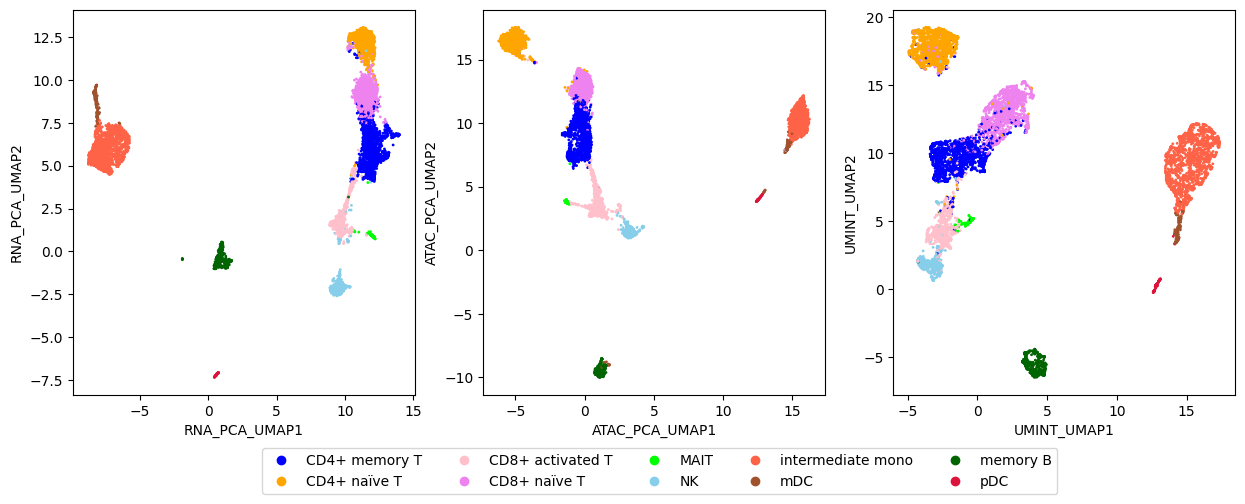

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
scatter = axes[2].scatter(low_umap[:,0],low_umap[:,1], c=values1, cmap=colors1, s=1)
axes[2].set_xlabel('UMINT_UMAP1')
axes[2].set_ylabel('UMINT_UMAP2')
axes[2].legend(handles=scatter.legend_elements()[0], labels=classes1, bbox_to_anchor = (0.5, -0.12), ncol=5)
scatter = axes[1].scatter(atacUMAP[:,0],atacUMAP[:,1], c=values2, cmap=colors2, s=1)
axes[1].set_xlabel('ATAC_PCA_UMAP1')
axes[1].set_ylabel('ATAC_PCA_UMAP2')
scatter = axes[0].scatter(rnaUMAP[:,0],rnaUMAP[:,1], c=values1, cmap=colors1, s=1)
axes[0].set_xlabel('RNA_PCA_UMAP1')
axes[0].set_ylabel('RNA_PCA_UMAP2')
plt.savefig('/home/chayan/UMINT/pbmc10k/preprocessed_hvg/ATACseq_UMAP.eps',dpi=1200, bbox_inches='tight')

In [23]:
pd.DataFrame(low_umap).to_csv('/home/chayan/UMINT/pbmc10k/preprocessed_hvg/UMINT_UMAP.csv')
pd.DataFrame(rnaUMAP).to_csv('/home/chayan/UMINT/pbmc10k/preprocessed_hvg/RNA_PCA_UMAP.csv')
pd.DataFrame(atacUMAP).to_csv('/home/chayan/UMINT/pbmc10k/preprocessed_hvg/ATAC_PCA_UMAP.csv')